In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('Amazon Sale Report.csv')
dataset

/tmp/ipython-input-3281166280.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('/content/drive/MyDrive/E-Commerce Sales/Amazon Sale Report.csv')


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [4]:
dataset.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [5]:
dataset.isnull().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0


In [6]:
dataset.dropna(inplace=True)

In [7]:
dataset

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
49051,49051,408-4858463-2356347,05-31-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0385,J0385-KR-M,kurta,...,INR,888.0,RAJAHMUNDRY,ANDHRA PRADESH,533126.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
49077,49077,402-7697834-2682766,05-31-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3654,JNE3654-TP-XXL,Top,...,INR,371.0,CHENNAI,TAMIL NADU,600042.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
49081,49081,402-7031777-0396341,05-31-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3798,JNE3798-KR-XS,Western Dress,...,INR,771.0,NEDUMANGAD,KERALA,695541.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
49082,49082,408-1235521-4337163,05-31-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0152,J0152-DR-L,Western Dress,...,INR,0.0,LEH,JAMMU & KASHMIR,194101.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
49083,49083,403-3845187-4421165,05-31-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0157,J0157-DR-XL,Western Dress,...,INR,690.0,PIMPRI CHINCHWAD,MAHARASHTRA,411027.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128872,128872,405-4724097-1016369,06-01-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0243,J0243-DR-S,Ethnic Dress,...,INR,999.0,ALLUR,ANDHRA PRADESH,524315.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
128873,128873,405-4724097-1016369,06-01-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0079,J0079-SKD-S,Set,...,INR,1523.0,ALLUR,ANDHRA PRADESH,524315.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
128874,128874,405-4724097-1016369,06-01-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0009,J0009-SKD-S,Set,...,INR,854.0,ALLUR,ANDHRA PRADESH,524315.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
128887,128887,405-6493630-8542756,05-31-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0301,J0301-TP-M,Top,...,INR,518.0,NOIDA,UTTAR PRADESH,201301.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False


In [8]:
dataset = dataset.drop(columns = ['index', 'Order ID'], axis=1) # These columns are just for indexing and they do not help in training.

In [9]:
for column in dataset.columns:
  if dataset[column].nunique() == 1:
    print(f"Count of unique values for column '{column}': {dataset[column].unique()}\n")
    # These columns should be removed since they have only one value.

Count of unique values for column 'Fulfilment': ['Merchant']

Count of unique values for column 'Sales Channel ': ['Amazon.in']

Count of unique values for column 'ship-service-level': ['Standard']

Count of unique values for column 'currency': ['INR']

Count of unique values for column 'ship-country': ['IN']

Count of unique values for column 'fulfilled-by': ['Easy Ship']

Count of unique values for column 'Unnamed: 22': [False]



In [10]:
dataset = dataset.drop(columns = ['Fulfilment', 'Sales Channel ', 'ship-service-level', 'currency', 'ship-country', 'fulfilled-by', 'Unnamed: 22'], axis=1)

In [11]:
dataset

,Date,Status,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
49051,05-31-22,Shipped - Delivered to Buyer,J0385,J0385-KR-M,kurta,M,B09YYNG98D,Shipped,1,888.0,RAJAHMUNDRY,ANDHRA PRADESH,533126.0,Amazon PLCC Free-Financing Universal Merchant ...,False
49077,05-31-22,Shipped - Delivered to Buyer,JNE3654,JNE3654-TP-XXL,Top,XXL,B09B3GWVJ9,Shipped,1,371.0,CHENNAI,TAMIL NADU,600042.0,Amazon PLCC Free-Financing Universal Merchant ...,False
49081,05-31-22,Shipped - Delivered to Buyer,JNE3798,JNE3798-KR-XS,Western Dress,XS,B09SDY7MHD,Shipped,1,771.0,NEDUMANGAD,KERALA,695541.0,Amazon PLCC Free-Financing Universal Merchant ...,False
49082,05-31-22,Shipped - Delivered to Buyer,J0152,J0152-DR-L,Western Dress,L,B08V197XLZ,Shipped,1,0.0,LEH,JAMMU & KASHMIR,194101.0,Amazon PLCC Free-Financing Universal Merchant ...,False
49083,05-31-22,Shipped - Delivered to Buyer,J0157,J0157-DR-XL,Western Dress,XL,B098316HXL,Shipped,1,690.0,PIMPRI CHINCHWAD,MAHARASHTRA,411027.0,Amazon PLCC Free-Financing Universal Merchant ...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128872,06-01-22,Shipped - Delivered to Buyer,J0243,J0243-DR-S,Ethnic Dress,S,B092648LBY,Shipped,1,999.0,ALLUR,ANDHRA PRADESH,524315.0,Amazon PLCC Free-Financing Universal Merchant ...,False
128873,06-01-22,Shipped - Delivered to Buyer,J0079,J0079-SKD-S,Set,S,B08XNG67ZL,Shipped,1,1523.0,ALLUR,ANDHRA PRADESH,524315.0,Amazon PLCC Free-Financing Universal Merchant ...,False
128874,06-01-22,Shipped - Delivered to Buyer,J0009,J0009-SKD-S,Set,S,B0894X8979,Shipped,1,854.0,ALLUR,ANDHRA PRADESH,524315.0,Amazon PLCC Free-Financing Universal Merchant ...,False
128887,05-31-22,Shipped - Delivered to Buyer,J0301,J0301-TP-M,Top,M,B099S9DTR2,Shipped,1,518.0,NOIDA,UTTAR PRADESH,201301.0,Amazon PLCC Free-Financing Universal Merchant ...,False


In [12]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Day'] = dataset['Date'].dt.day
dataset['Month'] = dataset['Date'].dt.month
dataset['Year'] = dataset['Date'].dt.year
dataset = dataset.drop(columns = ['Date'], axis=1)

/tmp/ipython-input-728571041.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['Date'] = pd.to_datetime(dataset['Date'])


In [13]:
dataset

,Status,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B,Day,Month,Year
49051,Shipped - Delivered to Buyer,J0385,J0385-KR-M,kurta,M,B09YYNG98D,Shipped,1,888.0,RAJAHMUNDRY,ANDHRA PRADESH,533126.0,Amazon PLCC Free-Financing Universal Merchant ...,False,31,5,2022
49077,Shipped - Delivered to Buyer,JNE3654,JNE3654-TP-XXL,Top,XXL,B09B3GWVJ9,Shipped,1,371.0,CHENNAI,TAMIL NADU,600042.0,Amazon PLCC Free-Financing Universal Merchant ...,False,31,5,2022
49081,Shipped - Delivered to Buyer,JNE3798,JNE3798-KR-XS,Western Dress,XS,B09SDY7MHD,Shipped,1,771.0,NEDUMANGAD,KERALA,695541.0,Amazon PLCC Free-Financing Universal Merchant ...,False,31,5,2022
49082,Shipped - Delivered to Buyer,J0152,J0152-DR-L,Western Dress,L,B08V197XLZ,Shipped,1,0.0,LEH,JAMMU & KASHMIR,194101.0,Amazon PLCC Free-Financing Universal Merchant ...,False,31,5,2022
49083,Shipped - Delivered to Buyer,J0157,J0157-DR-XL,Western Dress,XL,B098316HXL,Shipped,1,690.0,PIMPRI CHINCHWAD,MAHARASHTRA,411027.0,Amazon PLCC Free-Financing Universal Merchant ...,False,31,5,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128872,Shipped - Delivered to Buyer,J0243,J0243-DR-S,Ethnic Dress,S,B092648LBY,Shipped,1,999.0,ALLUR,ANDHRA PRADESH,524315.0,Amazon PLCC Free-Financing Universal Merchant ...,False,1,6,2022
128873,Shipped - Delivered to Buyer,J0079,J0079-SKD-S,Set,S,B08XNG67ZL,Shipped,1,1523.0,ALLUR,ANDHRA PRADESH,524315.0,Amazon PLCC Free-Financing Universal Merchant ...,False,1,6,2022
128874,Shipped - Delivered to Buyer,J0009,J0009-SKD-S,Set,S,B0894X8979,Shipped,1,854.0,ALLUR,ANDHRA PRADESH,524315.0,Amazon PLCC Free-Financing Universal Merchant ...,False,1,6,2022
128887,Shipped - Delivered to Buyer,J0301,J0301-TP-M,Top,M,B099S9DTR2,Shipped,1,518.0,NOIDA,UTTAR PRADESH,201301.0,Amazon PLCC Free-Financing Universal Merchant ...,False,31,5,2022


In [14]:
categorical_features_to_freq = []
categorical_features_to_one_hot = []
for column in dataset.columns:
    if dataset[column].dtype == 'object' or dataset[column].dtype == 'bool':
      if dataset[column].nunique() > 2:
        categorical_features_to_freq.append(column)
      else:
        categorical_features_to_one_hot.append(column)

print("----Categorical Features to FreqEncoding----")
for feature in categorical_features_to_freq:
    print(feature, dataset[feature].nunique())
print()
print("----Categorical Features to OneHotEncoding----")
for feature in categorical_features_to_one_hot:
    print(feature, dataset[feature].nunique())

----Categorical Features to FreqEncoding----
Status 10
Style 1025
SKU 3880
Category 8
Size 11
ASIN 3878
ship-city 3080
ship-state 52
promotion-ids 4012

----Categorical Features to OneHotEncoding----
Courier Status 2
B2B 2


In [15]:
# Apply Frequency Encoding
for feature in categorical_features_to_freq:
    # Calculate frequencies
    freq_map = dataset[feature].value_counts(normalize=True).to_dict()
    # Map frequencies to the feature column
    dataset[feature + '_FreqEnc'] = dataset[feature].map(freq_map)
    # Droping the original column.
    dataset = dataset.drop(columns=[feature])

# Apply One-Hot Encoding
for feature in categorical_features_to_one_hot:
    # Apply one-hot encoding using get_dummies
    dummies = pd.get_dummies(dataset[feature], prefix=feature, drop_first=True) # drop_first to avoid multicollinearity
    # Concatenate the new dummy columns with the original DataFrame
    dataset = pd.concat([dataset, dummies], axis=1)
    # Droping the original column.
    dataset = dataset.drop(columns=[feature])

In [16]:
dataset

,Qty,Amount,ship-postal-code,Day,Month,Year,Status_FreqEnc,Style_FreqEnc,SKU_FreqEnc,Category_FreqEnc,Size_FreqEnc,ASIN_FreqEnc,ship-city_FreqEnc,ship-state_FreqEnc,promotion-ids_FreqEnc,Courier Status_Unshipped,B2B_True
49051,1,888.0,533126.0,31,5,2022,0.860313,0.000568,0.000206,0.316631,0.178492,0.000206,0.001135,0.045668,0.000103,False,False
49077,1,371.0,600042.0,31,5,2022,0.860313,0.002322,0.000619,0.073636,0.136591,0.000619,0.040147,0.088446,0.000206,False,False
49081,1,771.0,695541.0,31,5,2022,0.860313,0.020744,0.000826,0.229062,0.067702,0.000826,0.000155,0.060839,0.004799,False,False
49082,1,0.0,194101.0,31,5,2022,0.860313,0.001496,0.000516,0.229062,0.180659,0.000516,0.000516,0.006295,0.001703,False,False
49083,1,690.0,411027.0,31,5,2022,0.860313,0.004438,0.001187,0.229062,0.175293,0.001187,0.005367,0.166624,0.001032,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128872,1,999.0,524315.0,1,6,2022,0.860313,0.000877,0.000103,0.008050,0.121214,0.000103,0.000258,0.045668,0.000206,False,False
128873,1,1523.0,524315.0,1,6,2022,0.860313,0.000052,0.000052,0.361422,0.121214,0.000052,0.000258,0.045668,0.000206,False,False
128874,1,854.0,524315.0,1,6,2022,0.860313,0.000929,0.000103,0.361422,0.121214,0.000103,0.000258,0.045668,0.000206,False,False
128887,1,518.0,201301.0,31,5,2022,0.860313,0.002632,0.000877,0.073636,0.178492,0.000877,0.011404,0.084060,0.000103,False,False


In [17]:
dataset['Courier Status_Unshipped'].replace(to_replace=True, value=1, inplace=True)
dataset['Courier Status_Unshipped'].replace(to_replace=False, value=0, inplace=True)
dataset['B2B_True'].replace(to_replace=True, value=1, inplace=True)
dataset['B2B_True'].replace(to_replace=False, value=0, inplace=True)

/tmp/ipython-input-3103745920.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Courier Status_Unshipped'].replace(to_replace=True, value=1, inplace=True)
/tmp/ipython-input-3103745920.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Courier Status_Unshipped'].replace(to_repla

In [18]:
dataset

,Qty,Amount,ship-postal-code,Day,Month,Year,Status_FreqEnc,Style_FreqEnc,SKU_FreqEnc,Category_FreqEnc,Size_FreqEnc,ASIN_FreqEnc,ship-city_FreqEnc,ship-state_FreqEnc,promotion-ids_FreqEnc,Courier Status_Unshipped,B2B_True
49051,1,888.0,533126.0,31,5,2022,0.860313,0.000568,0.000206,0.316631,0.178492,0.000206,0.001135,0.045668,0.000103,0,0
49077,1,371.0,600042.0,31,5,2022,0.860313,0.002322,0.000619,0.073636,0.136591,0.000619,0.040147,0.088446,0.000206,0,0
49081,1,771.0,695541.0,31,5,2022,0.860313,0.020744,0.000826,0.229062,0.067702,0.000826,0.000155,0.060839,0.004799,0,0
49082,1,0.0,194101.0,31,5,2022,0.860313,0.001496,0.000516,0.229062,0.180659,0.000516,0.000516,0.006295,0.001703,0,0
49083,1,690.0,411027.0,31,5,2022,0.860313,0.004438,0.001187,0.229062,0.175293,0.001187,0.005367,0.166624,0.001032,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128872,1,999.0,524315.0,1,6,2022,0.860313,0.000877,0.000103,0.008050,0.121214,0.000103,0.000258,0.045668,0.000206,0,0
128873,1,1523.0,524315.0,1,6,2022,0.860313,0.000052,0.000052,0.361422,0.121214,0.000052,0.000258,0.045668,0.000206,0,0
128874,1,854.0,524315.0,1,6,2022,0.860313,0.000929,0.000103,0.361422,0.121214,0.000103,0.000258,0.045668,0.000206,0,0
128887,1,518.0,201301.0,31,5,2022,0.860313,0.002632,0.000877,0.073636,0.178492,0.000877,0.011404,0.084060,0.000103,0,0


In [19]:
target = dataset['Amount']
features = dataset.drop(columns=['Amount', 'Year'], axis=1)

In [20]:
target

,Amount
49051,888.0
49077,371.0
49081,771.0
49082,0.0
49083,690.0
...,...
128872,999.0
128873,1523.0
128874,854.0
128887,518.0


In [21]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

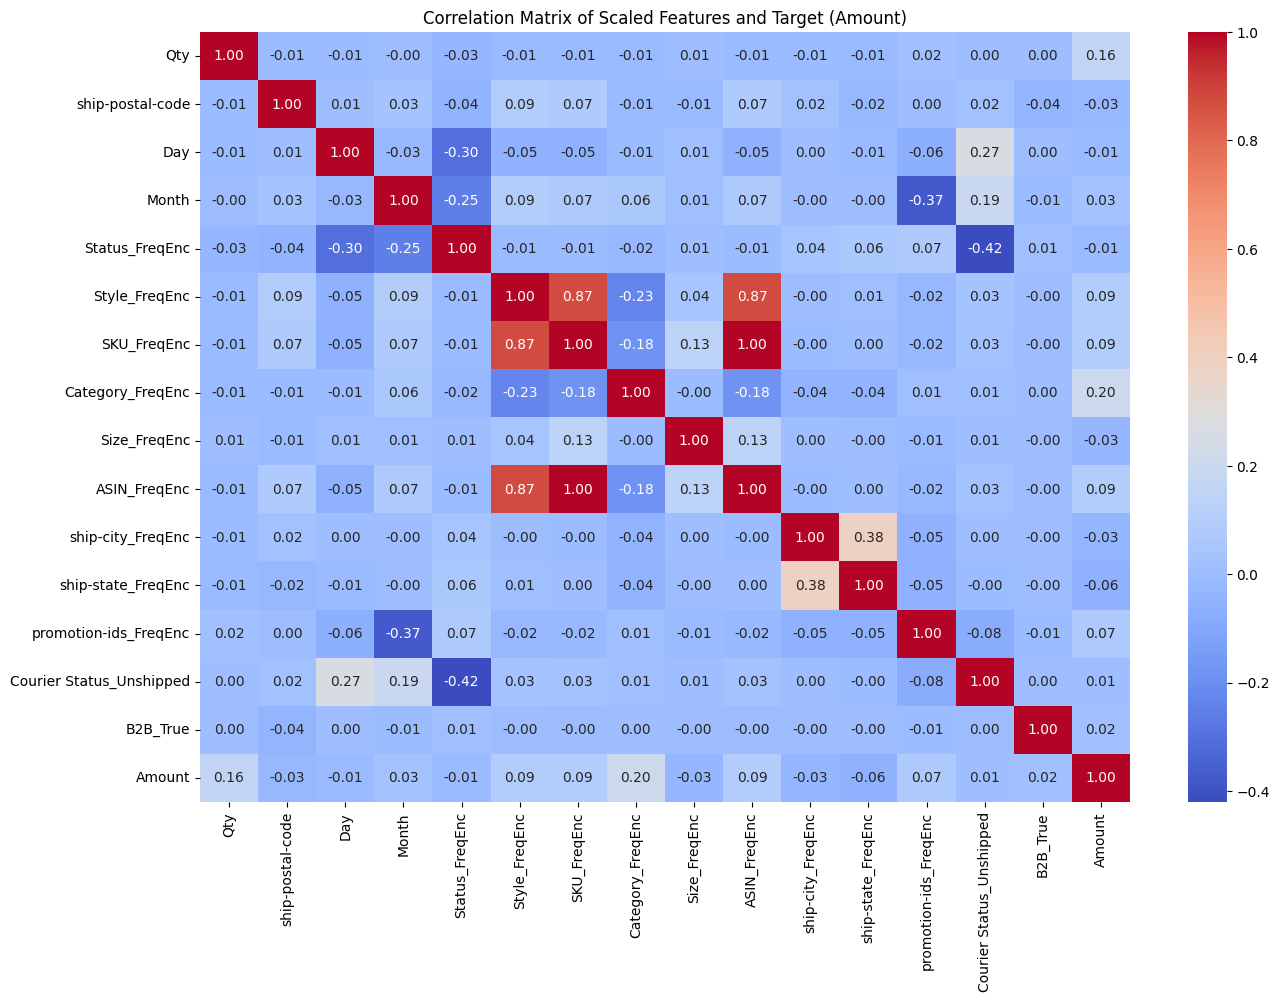

In [22]:
# Convert features_scaled back to a DataFrame with original column names and index
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Combine the scaled features with the target variable
combined_df = pd.concat([features_scaled_df, target], axis=1)

# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Scaled Features and Target (Amount)')
plt.show()

In [23]:
positive_correlation_with_amount = correlation_matrix['Amount'][correlation_matrix['Amount'] > 0].index.tolist()

In [24]:
target = dataset['Amount']
features = dataset[positive_correlation_with_amount].drop(columns=['Amount'], axis=1)

In [25]:
features

,Qty,Month,Style_FreqEnc,SKU_FreqEnc,Category_FreqEnc,ASIN_FreqEnc,promotion-ids_FreqEnc,Courier Status_Unshipped,B2B_True
49051,1,5,0.000568,0.000206,0.316631,0.000206,0.000103,0,0
49077,1,5,0.002322,0.000619,0.073636,0.000619,0.000206,0,0
49081,1,5,0.020744,0.000826,0.229062,0.000826,0.004799,0,0
49082,1,5,0.001496,0.000516,0.229062,0.000516,0.001703,0,0
49083,1,5,0.004438,0.001187,0.229062,0.001187,0.001032,0,0
...,...,...,...,...,...,...,...,...,...
128872,1,6,0.000877,0.000103,0.008050,0.000103,0.000206,0,0
128873,1,6,0.000052,0.000052,0.361422,0.000052,0.000206,0,0
128874,1,6,0.000929,0.000103,0.361422,0.000103,0.000206,0,0
128887,1,5,0.002632,0.000877,0.073636,0.000877,0.000103,0,0


In [26]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

In [28]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(15503, 9)
(15503,)
(3876, 9)
(3876,)


# Models


# XGBoost

In [29]:
# Initialize the XGBoost Regressor model
xgb_model = XGBRegressor(random_state=42, learning_rate = 0.2)
# Train the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [30]:
# Make predictions on the test set
xgb_predictions = xgb_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, xgb_predictions)
mse = mean_squared_error(y_test, xgb_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, xgb_predictions)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 102.87
Mean Squared Error (MSE): 31023.46
Root Mean Squared Error (RMSE): 176.13
R-squared (R2): 0.64


# AdaBoost

In [39]:
# Initialize the AdaBoost Regressor model
adaboost_model = AdaBoostRegressor(random_state=42, learning_rate = 0.4, n_estimators = 50)

# Train the model
adaboost_model.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.4, random_state=42)

In [40]:
# Make predictions on the test set
adaboost_predictions = adaboost_model.predict(X_test)

# Calculate evaluation metrics
mae_adaboost = mean_absolute_error(y_test, adaboost_predictions)
mse_adaboost = mean_squared_error(y_test, adaboost_predictions)
rmse_adaboost = np.sqrt(mse_adaboost)
r2_adaboost = r2_score(y_test, adaboost_predictions)

print("AdaBoost Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_adaboost:.2f}")
print(f"Mean Squared Error (MSE): {mse_adaboost:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_adaboost:.2f}")
print(f"R-squared (R2): {r2_adaboost:.2f}")

AdaBoost Model Performance:
Mean Absolute Error (MAE): 187.13
Mean Squared Error (MSE): 59972.91
Root Mean Squared Error (RMSE): 244.89
R-squared (R2): 0.30


# Random Forest

In [41]:
# Initialize the Random Forest Regressor model
random_forest_model = RandomForestRegressor(random_state=42, n_estimators = 200, max_depth = 50)

# Train the model
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, n_estimators=200, random_state=42)

In [42]:
# Make predictions on the test set
random_forest_predictions = random_forest_model.predict(X_test)

# Calculate evaluation metrics
mae_rf = mean_absolute_error(y_test, random_forest_predictions)
mse_rf = mean_squared_error(y_test, random_forest_predictions)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, random_forest_predictions)

print("Random Forest Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.2f}")

Random Forest Model Performance:
Mean Absolute Error (MAE): 94.08
Mean Squared Error (MSE): 35257.52
Root Mean Squared Error (RMSE): 187.77
R-squared (R2): 0.59
